In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

DEBUG=False
TS=0.3  # Testing size
RS=420  # Random State

In [44]:
# Read the data
data = pd.read_csv("winequality-red.csv", sep=";")

if DEBUG:
    print(data.head())
    print(data.describe())

In [45]:
# Split the data
np_data = data.to_numpy()
X = np_data[:,:11]
y = np_data[:,11]

In [46]:
if DEBUG:
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=RS)

# Change the y values to binary classification
y_train = np.array([-1 if yt < 5.5 else 1 for yt in y_train])
y_test = np.array([-1 if yt < 5.5 else 1 for yt in y_test])

if DEBUG:
    print(y_train.min())
    print(y_train.max())
    print(y_test.min())
    print(y_test.max())

At least two different classification methods covered in this course should be used. One of the following three methods must be used:
- [] Support Vector Machine method
- [] Artificial Neural Networks method
- [x] Random Forest method.

## Random Forest method

In [48]:
# Train a hyperparameterized model
param = {"n_estimators": np.arange(1, 150, 5), "max_depth": np.arange(1, 100, 10)}
rf_grid = GridSearchCV(
    RandomForestClassifier(
        random_state=RS,
        criterion="entropy"),
    param_grid=param, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=420),
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                         'n_estimators': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146])})

In [49]:
print("Best parameters set found on development set:")
print(rf_grid.best_params_)
print()

# Training and Testing Accuracy
print("Optimal parameter scores:")
print(f"Training score: {rf_grid.score(X_train, y_train)}")
print(f"Testing score: {rf_grid.score(X_test, y_test)}")

Best parameters set found on development set:
{'max_depth': 31, 'n_estimators': 91}

Optimal parameter scores:
Training score: 1.0
Testing score: 0.8083333333333333


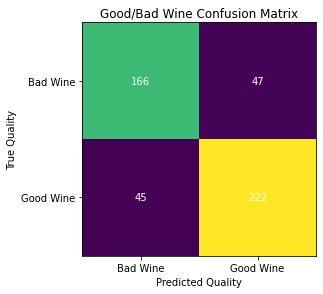

In [50]:
# Confuction Matrix
def create_confusion_matrix(c_mat, tick_labels=["Bad Wine", "Good Wine"]):
    c_matrix = confusion_matrix(y_test, rf_grid.predict(X_test))
    fig, ax = plt.subplots()
    im = ax.imshow(c_mat)

    ax.set_xticks(np.arange(len(c_mat)))
    ax.set_yticks(np.arange(len(c_mat)))

    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)

    for i in range(len(c_mat)):
        for j in range(len(c_mat[i])):
            text = ax.text(j, i, c_mat[i, j],
                        ha="center", va="center", color="w")

    ax.set_title("Good/Bad Wine Confusion Matrix")
    fig.tight_layout()
    plt.xlabel("Predicted Quality")
    plt.ylabel("True Quality")
    plt.show()

c_matrix = confusion_matrix(y_test, rf_grid.predict(X_test))
create_confusion_matrix(c_matrix)

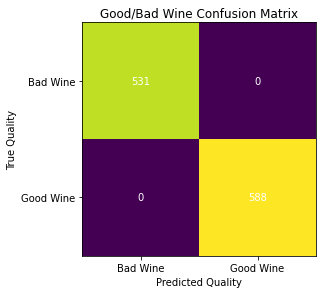

In [51]:
c_matrix = confusion_matrix(y_train, rf_grid.predict(X_train))
create_confusion_matrix(c_matrix)

## KNN Method with Binary Classification

In [52]:
k_possibilities = np.linspace(3, 100, 70, dtype="int_")
param = {"n_neighbors": k_possibilities}
knn_grid = GridSearchCV(
    KNeighborsClassifier(metric="euclidean"),
    param_grid=param
)
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([  3,   4,   5,   7,   8,  10,  11,  12,  14,  15,  17,  18,  19,
        21,  22,  24,  25,  26,  28,  29,  31,  32,  33,  35,  36,  38,
        39,  40,  42,  43,  45,  46,  47,  49,  50,  52,  53,  55,  56,
        57,  59,  60,  62,  63,  64,  66,  67,  69,  70,  71,  73,  74,
        76,  77,  78,  80,  81,  83,  84,  85,  87,  88,  90,  91,  92,
        94,  95,  97,  98, 100])})

In [53]:
print("Best parameters set found on development set:")
print(knn_grid.best_params_)
print()

# Training and Testing Accuracy
print("Optimal parameter scores:")
print(f"Training score: {knn_grid.score(X_train, y_train)}")
print(f"Testing score: {knn_grid.score(X_test, y_test)}")

Best parameters set found on development set:
{'n_neighbors': 19}

Optimal parameter scores:
Training score: 0.6934763181411975
Testing score: 0.6604166666666667


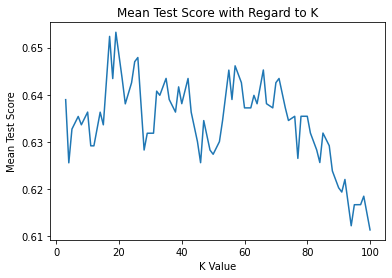

In [54]:
plt.plot(k_possibilities, knn_grid.cv_results_["mean_test_score"])
plt.xlabel("K Value")
plt.ylabel("Mean Test Score")
plt.title("Mean Test Score with Regard to K")
plt.show()

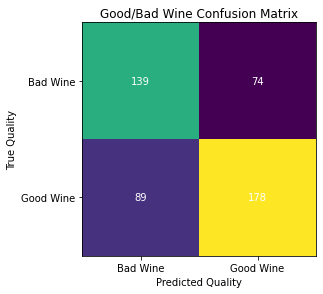

In [55]:
c_matrix = confusion_matrix(y_test, knn_grid.predict(X_test))
create_confusion_matrix(c_matrix)

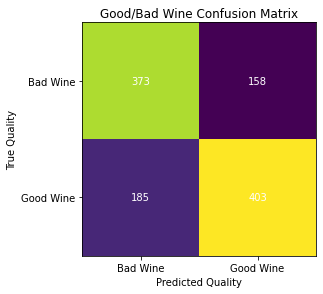

In [56]:
c_matrix = confusion_matrix(y_train, knn_grid.predict(X_train))
create_confusion_matrix(c_matrix)

## KNN Method without Binary Classification

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=RS)
knn_grid = GridSearchCV(
    KNeighborsClassifier(metric="euclidean"),
    param_grid=param
)
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([  3,   4,   5,   7,   8,  10,  11,  12,  14,  15,  17,  18,  19,
        21,  22,  24,  25,  26,  28,  29,  31,  32,  33,  35,  36,  38,
        39,  40,  42,  43,  45,  46,  47,  49,  50,  52,  53,  55,  56,
        57,  59,  60,  62,  63,  64,  66,  67,  69,  70,  71,  73,  74,
        76,  77,  78,  80,  81,  83,  84,  85,  87,  88,  90,  91,  92,
        94,  95,  97,  98, 100])})

In [58]:
print("Best parameters set found on development set:")
print(knn_grid.best_params_)
print()

# Training and Testing Accuracy
print("Optimal parameter scores:")
print(f"Training score: {knn_grid.score(X_train, y_train)}")
print(f"Testing score: {knn_grid.score(X_test, y_test)}")

Best parameters set found on development set:
{'n_neighbors': 22}

Optimal parameter scores:
Training score: 0.5585344057193923
Testing score: 0.4895833333333333


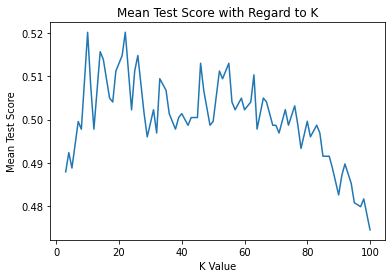

In [59]:
plt.plot(k_possibilities, knn_grid.cv_results_["mean_test_score"])
plt.xlabel("K Value")
plt.ylabel("Mean Test Score")
plt.title("Mean Test Score with Regard to K")
plt.show()

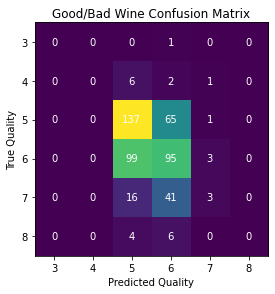

In [60]:
c_matrix = confusion_matrix(y_test, knn_grid.predict(X_test))
create_confusion_matrix(c_matrix, tick_labels=[3, 4, 5, 6, 7, 8])

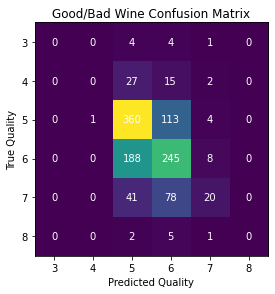

In [61]:
c_matrix = confusion_matrix(y_train, knn_grid.predict(X_train))
create_confusion_matrix(c_matrix, tick_labels=[3, 4, 5, 6, 7, 8])